# Technical Analysis

In [9]:
# import
import pandas as pd
import numpy as np
import hvplot.pandas
from pathlib import Path
from finta import TA

In [10]:
# read crypto csv into a dataframe
CC_df = pd.read_csv(
    Path("historical_CC.csv"), 
    parse_dates = True, 
    infer_datetime_format = True
)
CC_df.head()

,Date,Open,High,Low,Close,Volume
0,2018-02-01 00:00:00+00:00,10237.299805,10288.799805,8812.280273,9170.540039,9959400448
1,2018-02-02 00:00:00+00:00,9142.280273,9142.280273,7796.490234,8830.750000,12726899712
2,2018-02-03 00:00:00+00:00,8852.120117,9430.750000,8251.629883,9174.910156,7263790080
3,2018-02-04 00:00:00+00:00,9175.700195,9334.870117,8031.220215,8277.009766,7073549824
4,2018-02-05 00:00:00+00:00,8270.540039,8364.839844,6756.680176,6955.270020,9285289984


In [11]:
# plot crypto 'Close'
CC_df['Close'].hvplot()

:Curve   [index]   (Close)

In [12]:
pattern_df = CC_df.copy()

In [13]:
### Market Momentum 'MOM'
# Momentum is the rate of acceleration of a security's price—that is, the speed at which the price is changing. 
# Market momentum refers to the aggregate rate of acceleration for the broader market as a whole.
# Market Momentum average of 10 periods
# https://www.investopedia.com/terms/m/marketmomentum.asp
pattern_df['mm'] = TA.MOM(pattern_df, 10)
#mm_plot= pattern_df['mm'].hvplot.line(height=500,width=1000, yformatter='%.0f', title= "BTC Market Momentum", line_color='purple')
#mm_plot
pattern_df

,Date,Open,High,Low,Close,Volume,mm
0,2018-02-01 00:00:00+00:00,10237.299805,10288.799805,8812.280273,9170.540039,9959400448,NaN
1,2018-02-02 00:00:00+00:00,9142.280273,9142.280273,7796.490234,8830.750000,12726899712,NaN
2,2018-02-03 00:00:00+00:00,8852.120117,9430.750000,8251.629883,9174.910156,7263790080,NaN
3,2018-02-04 00:00:00+00:00,9175.700195,9334.870117,8031.220215,8277.009766,7073549824,NaN
4,2018-02-05 00:00:00+00:00,8270.540039,8364.839844,6756.680176,6955.270020,9285289984,NaN
...,...,...,...,...,...,...,...
1807,2023-01-13 00:00:00+00:00,18868.906250,19964.322266,18753.164062,19909.574219,29225029694,3229.716797
1808,2023-01-14 00:00:00+00:00,19910.537109,21075.142578,19907.828125,20976.298828,38967784639,4113.060547
1809,2023-01-15 00:00:00+00:00,20977.484375,20993.748047,20606.986328,20880.798828,19298407543,4044.062500
1810,2023-01-16 00:00:00+00:00,20882.224609,21360.875000,20715.746094,21169.632812,26792494050,4217.664062


In [14]:
# Mom signal column to buy and sell 
# Set the Signal column
pattern_df["MM Signal"] = 0.0

# Generate the trading signals 1 (entry) or -1 (exit) for a long position trading algorithm
# where 1 is when the MM pattern is recognize to buy
# where -1 is when the MM pattern is recognize to sell
for index, row in pattern_df.iterrows():
    # Buy when there mm greater than 0
    if row["mm"] > 0:
        pattern_df.loc[index, "MM Signal"] = 1.0    
    # Sell when there is a mm less than 0
    elif row["mm"] < 0 :
        pattern_df.loc[index,"MM Signal"] = -1.0
        
# Review the DataFrame
pattern_df

,Date,Open,High,Low,Close,Volume,mm,MM Signal
0,2018-02-01 00:00:00+00:00,10237.299805,10288.799805,8812.280273,9170.540039,9959400448,NaN,0.0
1,2018-02-02 00:00:00+00:00,9142.280273,9142.280273,7796.490234,8830.750000,12726899712,NaN,0.0
2,2018-02-03 00:00:00+00:00,8852.120117,9430.750000,8251.629883,9174.910156,7263790080,NaN,0.0
3,2018-02-04 00:00:00+00:00,9175.700195,9334.870117,8031.220215,8277.009766,7073549824,NaN,0.0
4,2018-02-05 00:00:00+00:00,8270.540039,8364.839844,6756.680176,6955.270020,9285289984,NaN,0.0
...,...,...,...,...,...,...,...,...
1807,2023-01-13 00:00:00+00:00,18868.906250,19964.322266,18753.164062,19909.574219,29225029694,3229.716797,1.0
1808,2023-01-14 00:00:00+00:00,19910.537109,21075.142578,19907.828125,20976.298828,38967784639,4113.060547,1.0
1809,2023-01-15 00:00:00+00:00,20977.484375,20993.748047,20606.986328,20880.798828,19298407543,4044.062500,1.0
1810,2023-01-16 00:00:00+00:00,20882.224609,21360.875000,20715.746094,21169.632812,26792494050,4217.664062,1.0


<AxesSubplot:>

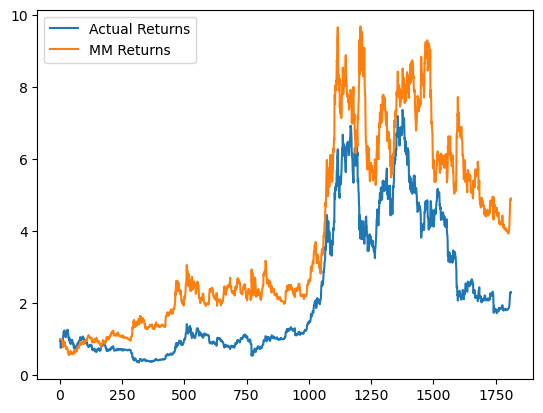

In [15]:
# Compute Actual Returns
# pct_change function to generate returns from close prices
pattern_df["Actual Returns"] = pattern_df["Close"].pct_change()

# add MM Returns to pattern_df
pattern_df['MM Returns'] = pattern_df['Actual Returns'] * pattern_df['MM Signal'].shift()

# Plot MM Returns to examine performance
(1 + pattern_df[["Actual Returns", "MM Returns"]]).cumprod().plot()

In [16]:
# returns
mm_return = (1 + pattern_df["MM Returns"]).cumprod()
cc_return = (1 + pattern_df["Actual Returns"]).cumprod()
length = len(mm_return)-1
print(f'MM strategy returns:  {round(mm_return[length], 2)}')
print(f'CC returns:  {round(cc_return[length], 2)}')

MM strategy returns:  4.91
CC returns:  2.31


In [17]:
initial_investment = 1000

mm_inv_returns  = initial_investment * mm_return[length]
cc_inv_returns = initial_investment * cc_return[length]

print(f"buying ${initial_investment} and holding: ${round(cc_inv_returns, 2)}")
print(f"buying ${initial_investment} with Market Momentum strategy: ${round(mm_inv_returns, 2)}")

buying $1000 and holding: $2307.55
buying $1000 with Market Momentum strategy: $4908.89


In [18]:
# Visualize entry position relative to close price
entry = pattern_df[pattern_df["MM Signal"] == 1.0]["Close"].hvplot.scatter(
    color="green",
    marker="^",
    size=200,
    legend=False,
    ylabel="$",
    width=1000,
    height=400,
    title = "MM Signal"
)

# Visualize exit position relative to close price
exit = pattern_df[pattern_df["MM Signal"] == -1.0]["Close"].hvplot.scatter(
    color="red",
    marker="v",
    size=200,
    legend=False,
    ylabel="$",
    width=1000,
    height=400
)

# Visualize close price for the investment
cc_close = pattern_df[["Close"]].hvplot(
    line_color="gray",
    ylabel="$",
    width=1000,
    height=400
)

# Overlay plots
pattern_plot = cc_close  * entry * exit
pattern_plot


:Overlay
   .Curve.I          :Curve   [index]   (Close)
   .Scatter.Close.I  :Scatter   [index]   (Close)
   .Scatter.Close.II :Scatter   [index]   (Close)

# Chaikin Oscillator and Kaufman Efficiency Indicator
### Chaikin: the oscillator measures the accumulation-distribution line of moving average convergence-divergence (MACD). https://www.investopedia.com/terms/c/chaikinoscillator.asp
The ER oscillates between 0 and 1. Trending markets typically exhibit ERs closer to 1, while choppy markets have ERs closer to 0. https://tradingtact.com/kaufman-efficiency-ratio/

In [19]:
# Chaikin: the oscillator measures the accumulation-distribution line of moving average convergence-divergence (MACD). 
# https://www.investopedia.com/terms/c/chaikinoscillator.asp
pattern_df['chaikin']= TA.CHAIKIN(CC_df)
pattern_df['ER'] = TA.ER(CC_df)
#chai_plot = combined_df['chaikin'].hvplot.line(height=500,width=1000, yformatter='%.0f', title= "BTC Chaikin", line_color='green')
pattern_df


,Date,Open,High,Low,Close,Volume,mm,MM Signal,Actual Returns,MM Returns,chaikin,ER
0,2018-02-01 00:00:00+00:00,10237.299805,10288.799805,8812.280273,9170.540039,9959400448,NaN,0.0,NaN,NaN,NaN,NaN
1,2018-02-02 00:00:00+00:00,9142.280273,9142.280273,7796.490234,8830.750000,12726899712,NaN,0.0,-0.037052,-0.000000,NaN,NaN
2,2018-02-03 00:00:00+00:00,8852.120117,9430.750000,8251.629883,9174.910156,7263790080,NaN,0.0,0.038973,0.000000,NaN,NaN
3,2018-02-04 00:00:00+00:00,9175.700195,9334.870117,8031.220215,8277.009766,7073549824,NaN,0.0,-0.097865,-0.000000,NaN,NaN
4,2018-02-05 00:00:00+00:00,8270.540039,8364.839844,6756.680176,6955.270020,9285289984,NaN,0.0,-0.159688,-0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1807,2023-01-13 00:00:00+00:00,18868.906250,19964.322266,18753.164062,19909.574219,29225029694,3229.716797,1.0,0.055114,0.055114,3.636971e+10,0.983854
1808,2023-01-14 00:00:00+00:00,19910.537109,21075.142578,19907.828125,20976.298828,38967784639,4113.060547,1.0,0.053578,0.053578,4.718715e+10,0.987277
1809,2023-01-15 00:00:00+00:00,20977.484375,20993.748047,20606.986328,20880.798828,19298407543,4044.062500,1.0,-0.004553,-0.004553,4.987666e+10,0.954900
1810,2023-01-16 00:00:00+00:00,20882.224609,21360.875000,20715.746094,21169.632812,26792494050,4217.664062,1.0,0.013833,0.013833,4.991332e+10,0.956676


In [20]:
# Chaikin + ER to produce a Ch_ER signal column to buy and sell 
# Set the Signal column
pattern_df["Ch_ER Signal"] = 0.0

# Generate the trading signals 1 (entry) or -1 (exit) for a long position trading algorithm
# where 1 is when the chaikin is higher than 1,000,000 and ER greater or equal to .30 is recognize to buy
# where -1 is when the chaikin is less than 1,000,000 and ER less than .30 is recognize to sell
for index, row in pattern_df.iterrows():
    # Buy  
    if row['chaikin'] >= 1000000 and row['ER'] >=.30:
        pattern_df.loc[index, "Ch_ER Signal"] = 1.0
        
    # Sell
    elif row["chaikin"] < 1000000  and row['ER'] < .30 :
        pattern_df.loc[index,"Ch_ER Signal"] = -1.0
    

# Review the DataFrame
pattern_df

,Date,Open,High,Low,Close,Volume,mm,MM Signal,Actual Returns,MM Returns,chaikin,ER,Ch_ER Signal
0,2018-02-01 00:00:00+00:00,10237.299805,10288.799805,8812.280273,9170.540039,9959400448,NaN,0.0,NaN,NaN,NaN,NaN,0.0
1,2018-02-02 00:00:00+00:00,9142.280273,9142.280273,7796.490234,8830.750000,12726899712,NaN,0.0,-0.037052,-0.000000,NaN,NaN,0.0
2,2018-02-03 00:00:00+00:00,8852.120117,9430.750000,8251.629883,9174.910156,7263790080,NaN,0.0,0.038973,0.000000,NaN,NaN,0.0
3,2018-02-04 00:00:00+00:00,9175.700195,9334.870117,8031.220215,8277.009766,7073549824,NaN,0.0,-0.097865,-0.000000,NaN,NaN,0.0
4,2018-02-05 00:00:00+00:00,8270.540039,8364.839844,6756.680176,6955.270020,9285289984,NaN,0.0,-0.159688,-0.000000,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,2023-01-13 00:00:00+00:00,18868.906250,19964.322266,18753.164062,19909.574219,29225029694,3229.716797,1.0,0.055114,0.055114,3.636971e+10,0.983854,1.0
1808,2023-01-14 00:00:00+00:00,19910.537109,21075.142578,19907.828125,20976.298828,38967784639,4113.060547,1.0,0.053578,0.053578,4.718715e+10,0.987277,1.0
1809,2023-01-15 00:00:00+00:00,20977.484375,20993.748047,20606.986328,20880.798828,19298407543,4044.062500,1.0,-0.004553,-0.004553,4.987666e+10,0.954900,1.0
1810,2023-01-16 00:00:00+00:00,20882.224609,21360.875000,20715.746094,21169.632812,26792494050,4217.664062,1.0,0.013833,0.013833,4.991332e+10,0.956676,1.0


<AxesSubplot:title={'center':'Chaikin and ER vs. Actual Returns'}>

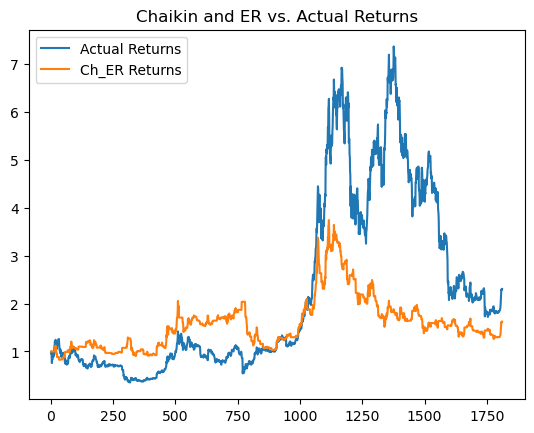

In [21]:
# add Ch_ER returns to pattern_df
pattern_df['Ch_ER Returns'] = pattern_df['Actual Returns'] * pattern_df['Ch_ER Signal'].shift()

# Plot Ch_ER Returns to examine performance
(1 + pattern_df[["Actual Returns", "Ch_ER Returns"]]).cumprod().plot(title = "Chaikin and ER vs. Actual Returns")

In [22]:
# returns
Ch_ER_return = (1 + pattern_df["Ch_ER Returns"]).cumprod()
cc_return = (1 + pattern_df["Actual Returns"]).cumprod()
length = len(Ch_ER_return)-1
print(f'Chaikin strategy returns:  {round(Ch_ER_return[length], 2)}')
print(f'CC returns:  {round(cc_return[length], 2)}')

Chaikin strategy returns:  1.62
CC returns:  2.31


### Vortex Indicator: plots two oscillating lines: one to identify positive trend movement and the other to identify negative price movement. Crosses between the lines trigger buy and sell signals that are designed to capture the most dynamic trending action, higher or lower. 
https://www.investopedia.com/articles/active-trading/072115/understand-vortex-indicator-trading-strategies.asp


In [23]:
pattern_df[['vort -Di', 'vort +Di']] = TA.VORTEX(CC_df)
#vortex_plot = pattern_df[['vort -Di','vort +Di' ]].hvplot.line(height=500,width=1000, yformatter='%.0f', title= "BTC Vortex")
#display(vortex_plot)

# Vortex -Di and +Di to produce a Vortex signal column to buy and sell 
# Set the Signal column
pattern_df["vortex Signal"] = 0.0
iscrossover = False

# Generate the trading signals 1 (entry) or -1 (exit) for a long position trading algorithm
# where 1 is when the cross over -Di and +Di on positive trend is recognize to buy
# where -1 is when the cross over -Di and +Di on negative trend is recognize to sell
for index, row in pattern_df.iterrows():
    # Buy 
    if row['vort -Di'] <= row['vort +Di']:
        pattern_df.loc[index, "vortex Signal"] = 1.0
        
    # Sell 
    elif row['vort -Di'] > row['vort +Di'] :
        pattern_df.loc[index,"vortex Signal"] = -1.0
    
# Review the DataFrame
pattern_df


,Date,Open,High,Low,Close,Volume,mm,MM Signal,Actual Returns,MM Returns,chaikin,ER,Ch_ER Signal,Ch_ER Returns,vort -Di,vort +Di,vortex Signal
0,2018-02-01 00:00:00+00:00,10237.299805,10288.799805,8812.280273,9170.540039,9959400448,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0
1,2018-02-02 00:00:00+00:00,9142.280273,9142.280273,7796.490234,8830.750000,12726899712,NaN,0.0,-0.037052,-0.000000,NaN,NaN,0.0,-0.000000,NaN,NaN,0.0
2,2018-02-03 00:00:00+00:00,8852.120117,9430.750000,8251.629883,9174.910156,7263790080,NaN,0.0,0.038973,0.000000,NaN,NaN,0.0,0.000000,NaN,NaN,0.0
3,2018-02-04 00:00:00+00:00,9175.700195,9334.870117,8031.220215,8277.009766,7073549824,NaN,0.0,-0.097865,-0.000000,NaN,NaN,0.0,-0.000000,NaN,NaN,0.0
4,2018-02-05 00:00:00+00:00,8270.540039,8364.839844,6756.680176,6955.270020,9285289984,NaN,0.0,-0.159688,-0.000000,NaN,NaN,0.0,-0.000000,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,2023-01-13 00:00:00+00:00,18868.906250,19964.322266,18753.164062,19909.574219,29225029694,3229.716797,1.0,0.055114,0.055114,3.636971e+10,0.983854,1.0,0.055114,0.343689,1.459643,1.0
1808,2023-01-14 00:00:00+00:00,19910.537109,21075.142578,19907.828125,20976.298828,38967784639,4113.060547,1.0,0.053578,0.053578,4.718715e+10,0.987277,1.0,0.053578,0.271873,1.552724,1.0
1809,2023-01-15 00:00:00+00:00,20977.484375,20993.748047,20606.986328,20880.798828,19298407543,4044.062500,1.0,-0.004553,-0.004553,4.987666e+10,0.954900,1.0,-0.004553,0.317123,1.638800,1.0
1810,2023-01-16 00:00:00+00:00,20882.224609,21360.875000,20715.746094,21169.632812,26792494050,4217.664062,1.0,0.013833,0.013833,4.991332e+10,0.956676,1.0,0.013833,0.328158,1.604039,1.0


<AxesSubplot:title={'center':'Vortex vs. Actual Returns'}>

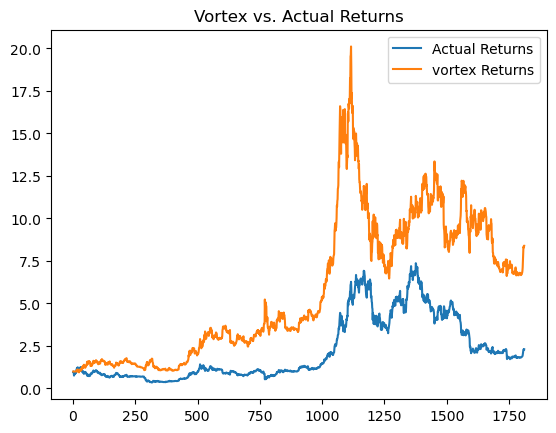

In [24]:
# add Vortex returns to pattern_df
pattern_df['vortex Returns'] = pattern_df['Actual Returns'] * pattern_df['vortex Signal'].shift()

# Plot Vortex Returns to examine performance
(1 + pattern_df[["Actual Returns", "vortex Returns"]]).cumprod().plot(title = "Vortex vs. Actual Returns")

In [25]:
# Visualize entry position relative to close price
entry = pattern_df[pattern_df["vortex Signal"] == 1.0]["Close"].hvplot.scatter(
    color="green",
    marker="^",
    size=200,
    legend=False,
    ylabel="$",
    width=1000,
    height=400,
    title = "Vortex Signal"
)

# Visualize exit position relative to close price
exit = pattern_df[pattern_df["vortex Signal"] == -1.0]["Close"].hvplot.scatter(
    color="red",
    marker="v",
    size=200,
    legend=False,
    ylabel="$",
    width=1000,
    height=400
)

# Visualize close price for the investment
cc_close = pattern_df[["Close"]].hvplot(
    line_color="gray",
    ylabel="$",
    width=1000,
    height=400
)

# Overlay plots
pattern_plot = cc_close  * entry * exit
pattern_plot



:Overlay
   .Curve.I          :Curve   [index]   (Close)
   .Scatter.Close.I  :Scatter   [index]   (Close)
   .Scatter.Close.II :Scatter   [index]   (Close)

In [26]:
# returns
vortex_return = (1 + pattern_df["vortex Returns"]).cumprod()
cc_return = (1 + pattern_df["Actual Returns"]).cumprod()
leng = len(vortex_return)-1
print(f'Vortex strategy returns:  {round(vortex_return[length], 2)}')
print(f'CC returns:  {round(cc_return[length], 2)}')

Vortex strategy returns:  8.39
CC returns:  2.31


In [27]:
initial_investment = 1000

vortex_inv_returns  = initial_investment * vortex_return[leng]
cc_inv_returns = initial_investment * cc_return[leng]

print(f"buying ${initial_investment} and holding: ${round(cc_inv_returns, 2)}")
print(f"buying ${initial_investment} with vortex strategy: ${round(vortex_inv_returns, 2)}")

buying $1000 and holding: $2307.55
buying $1000 with vortex strategy: $8394.35
